<a href="https://colab.research.google.com/github/vateseif/traffic_sign_recognition/blob/master/Traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtaini ng data from Kaggle (German traffic sign)

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle

In [0]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"vateseif99","key":"c00e2a500deb03e9e1ba578e43682111"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets.
!kaggle datasets list

In [0]:
# API call to download German traffic sign dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [0]:
import os, shutil

In [0]:
# Unzipping dataset
!unzip -q "gtsrb-german-traffic-sign.zip"

In [0]:
datasets = "/content/drive/My Drive/University/ACVPR/Datasets"
meta = "/content/Meta"
test = "/content/Test"
train = "/content/Train"
# shutil.move relocates the folders
try:
  shutil.move(meta, datasets+"/Meta")
  shutil.move(test, datasets+"/Test")
  shutil.move(train, datasets+"/Train")
except Exception as ex:
  print(ex)


In [0]:
!ls "/content/drive/My Drive/University/ACVPR/Datasets/Test"

04316.png  06136.png  07053.png  07575.png  08960.png  10283.png  11200.png
04413.png  06321.png  07077.png  07845.png  09233.png  10319.png  11344.png
04496.png  06616.png  07085.png  07949.png  09350.png  10439.png  11658.png
04821.png  06668.png  07167.png  08205.png  09493.png  10583.png  11842.png
04932.png  06692.png  07258.png  08700.png  09593.png  10706.png  12019.png
05022.png  06708.png  07275.png  08730.png  09646.png  10713.png  12098.png
05727.png  06939.png  07305.png  08784.png  09868.png  10735.png  12276.png
05786.png  06948.png  07454.png  08821.png  09937.png  11114.png  12502.png
05999.png  07005.png  07504.png  08938.png  10078.png  11176.png


In [0]:
try:
  shutil.move("/content/Meta.csv", datasets+"Meta.csv")
  shutil.move("/content/Test.csv", datasets+"Test.csv")
  shutil.move("/content/Train.csv", datasets+"Train.csv")
except Exception as ex:
  print(ex)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

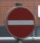

(43, 40, 3)

In [0]:
from google.colab.patches import cv2_imshow
im = "/content/drive/My Drive/University/ACVPR/Datasets/Test/00388.png"
img = cv2.imread(im, cv2.IMREAD_UNCHANGED)
# Show image
cv2_imshow(img)
(img.shape) 

In [0]:
train_data_dir = "/content/drive/My Drive/University/ACVPR/Datasets/Train"
test_data_dir = "/content/drive/My Drive/University/ACVPR/Datasets/Test"

test_data_dir = "/content/drive/My Drive/University/ACVPR/Datasets/Test/"
test_files = sorted(os.listdir(test_data_dir))[:12629]
len(test_files)

os.makedirs("/content/drive/My Drive/University/ACVPR/Datasets/Testing/42")

In [0]:
import pandas as pd
my_csv = pd.read_csv("/content/drive/My Drive/University/ACVPR/DatasetsTest.csv")
test_labels = my_csv["ClassId"]
test_labels[5076]
# you can also use my_csv['column_name']

1

In [0]:
print(test_data_dir+test_files[0])
print(test_data_dir+str(test_labels[int(test_files[0][:5])])+"/"+test_files[0])


In [0]:
testing_data_dir = "/content/drive/My Drive/University/ACVPR/Datasets/Testing/"
for files in test_files:
  try:
    os.rename(test_data_dir+files,
              testing_data_dir+str(test_labels[int(files[:5])])+"/"+files)
    print(test_data_dir+files, "==>", testing_data_dir+str(test_labels[int(files[:5])])+"/"+files)
  except Exception as ex:
    pass

target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
print('\n - names of classes: ', target_names, '\n - # of classes: ', nb_classes)

# Creating training data from folders


In [0]:
# Create dataset in array form from directory split in training (80%) and validation(20%)
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = "grayscale",
        target_size = (50,50),
        subset = "training",
        batch_size=32)


validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = "grayscale",
        target_size = (50,50),
        subset = "validation",
        batch_size=32)


print("train_generator has:",len(train_generator),"batches, with each a shape of",train_generator[1][0].shape)
print("")
print("yielding tuples of (x, y) where x is a NumPy array containing a batch of images with shape (batch_size, *target_size, channels) and y is a NumPy array of corresponding labels.")
print("")
print("train_generator has:",len(validation_generator),"batches, with each a shape of",validation_generator[1][0].shape)


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(
        testing_data_dir,
        color_mode = "grayscale",
        target_size = (50,50),
        batch_size=32)

Found 12681 images belonging to 43 classes.


# CNN 
After 10 epochs:\
validation_accuracy = 91.5%
test_accuracy = 82.7%

In [0]:
import keras
from keras import layers
from keras import models

# Declaring model
model = keras.models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(50,50,1)))   
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))                         
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(43,activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


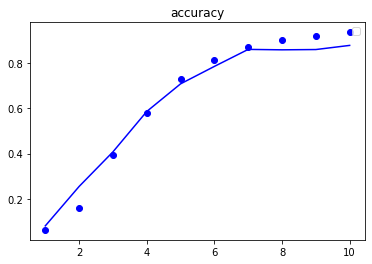

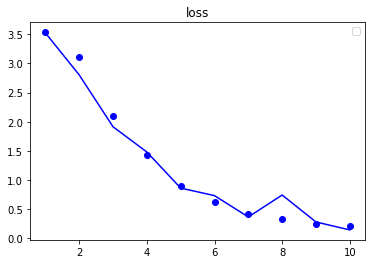

In [0]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo')
plt.plot(epochs,val_acc,'b')
plt.title('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'b')
plt.title('loss')
plt.legend()

plt.show()


In [0]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.8274999856948853
